In [2]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 272.8/272.8 MB 14.5 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 4.0/4.0 MB 35.9 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 26.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 40.2 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 36.3 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 32.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 47.6 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 25.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Ins

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [2]:
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import optimizers
#from keras.optimizer_v2.gradient_descent import SGD
#from keras.optimizer_v2.rmsprop import RMSprop
#from keras.optimizer_v2.adam import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools

%matplotlib inline

In [6]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [5]:
train_imagef.min(), train_imagef.max()

(0, 255)

Label is 0


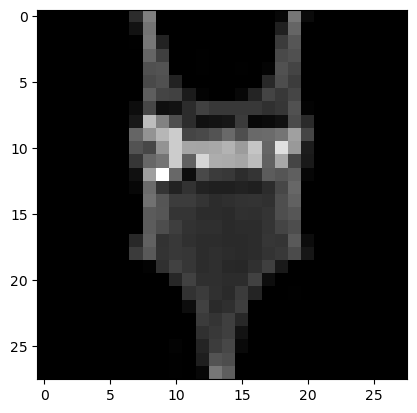

In [7]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

Fashion-MNIST — это набор изображений статей Zalando, состоящий из обучающего набора из 60 000 примеров и тестового набора из 10 000 примеров. Каждый пример представляет собой изображение в градациях серого 28x28, связанное с меткой из 10 классов.

In [8]:
X_train.min(), X_train.max()

(0, 255)

In [9]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [10]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [15]:
%%time
results_num = pd.DataFrame()
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []

n_list = [10, 50, 100, 150, 200, 250, 300, 350, 400]

for n in n_list:
    
    model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(n, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_num['n'] = n_list
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 1.1410 - accuracy: 0.6016 - val_loss: 0.7559 - val_accuracy: 0.7295
Epoch 2/5
938/938 [==============================] - 1s 976us/step - loss: 0.6347 - accuracy: 0.7807 - val_loss: 0.5865 - val_accuracy: 0.7947
Epoch 3/5
938/938 [===========

,n,train_loss,test_loss,train_metric,test_metric
4,200,0.439402,0.474480,0.846933,0.8325
8,400,0.441636,0.472970,0.846450,0.8322
1,50,0.445658,0.480025,0.843717,0.8284
5,250,0.450969,0.487221,0.841700,0.8272
6,300,0.448945,0.483303,0.843200,0.8264
2,100,0.457556,0.489737,0.837550,0.8240
0,10,0.469371,0.501070,0.835367,0.8221
7,350,0.458010,0.491306,0.836883,0.8210
3,150,0.468354,0.501451,0.831600,0.8209


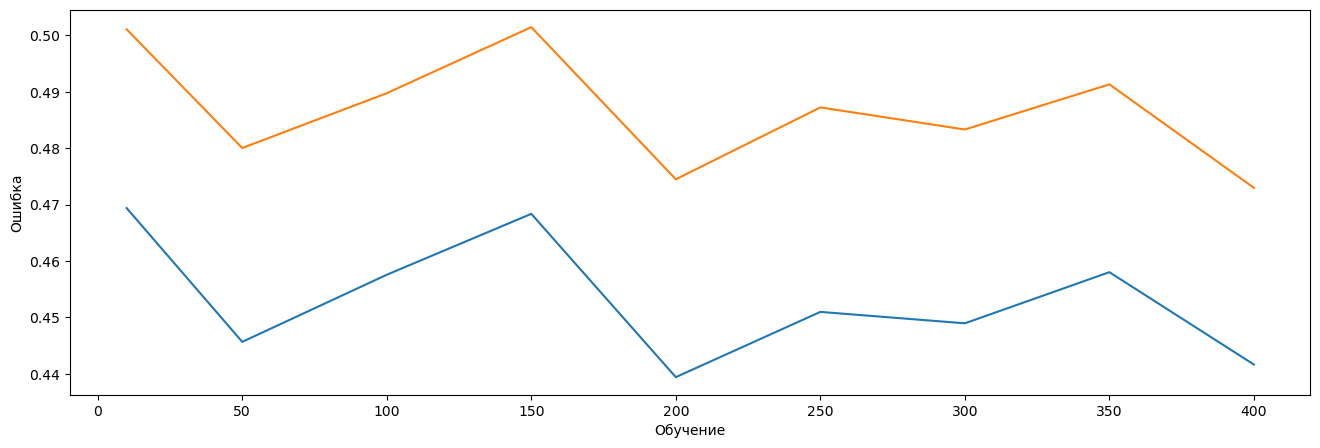

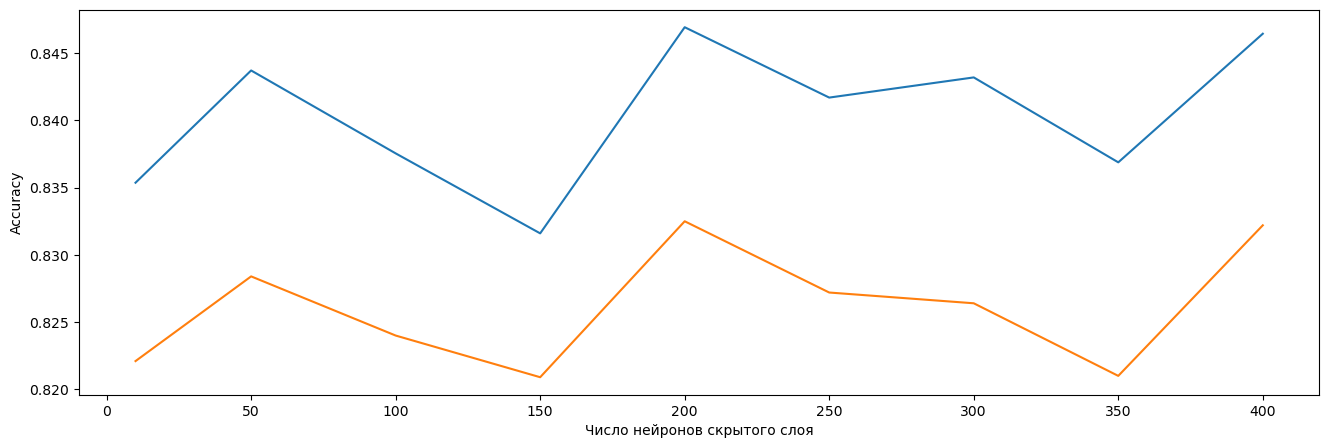

In [16]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_num['n'],results_num['train_loss'], label='train')
plt.plot(results_num['n'],results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_num['n'],results_num['train_metric'], label='train')
plt.plot(results_num['n'],results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.show()

Лучший результат оказался на 200 нейронах. Но картинка странная. 

In [19]:
%%time
model_list = []
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(200, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_list.append(model)
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_list.append(model)
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_list.append(model)
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_list.append(model)


results_layers = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
n_layers = [] # число скрытых слоев
n_pars = [] # число тренируемых параметров
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке

for model in model_list:

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                50240     
                                                                 
 dense_64 (Dense)            (None, 200)               13000     
                                                                 
 dense_65 (Dense)            (None, 10)                2010      
                                                                 
Total params: 65,250
Trainable params: 65,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.9873 - accuracy: 0.6830 - val_loss: 0.6669 - val_accuracy: 0.7642
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.5886 - accuracy: 0.7981 - val_loss: 0.5680 - val_accuracy: 0.7976
Epoch 3/5
938/938 [============

,train_loss,test_loss,train_metric,test_metric
2,0.418937,0.457051,0.853850,0.8380
0,0.455812,0.485240,0.841667,0.8293
1,0.503028,0.537771,0.819533,0.8062
3,0.494735,0.537268,0.818000,0.8041


In [20]:
results_layers['n_layer'] = [1,2,3,4]

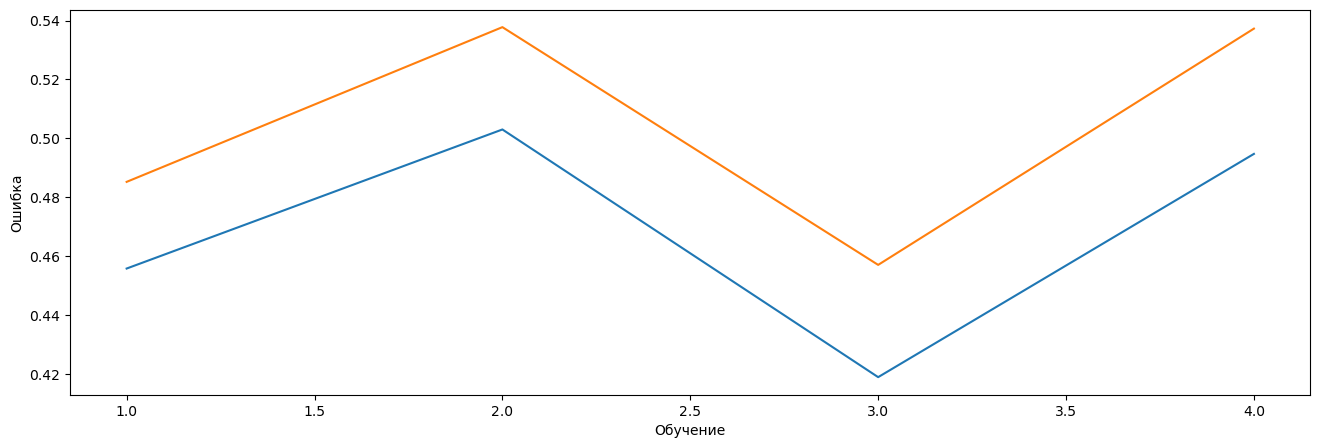

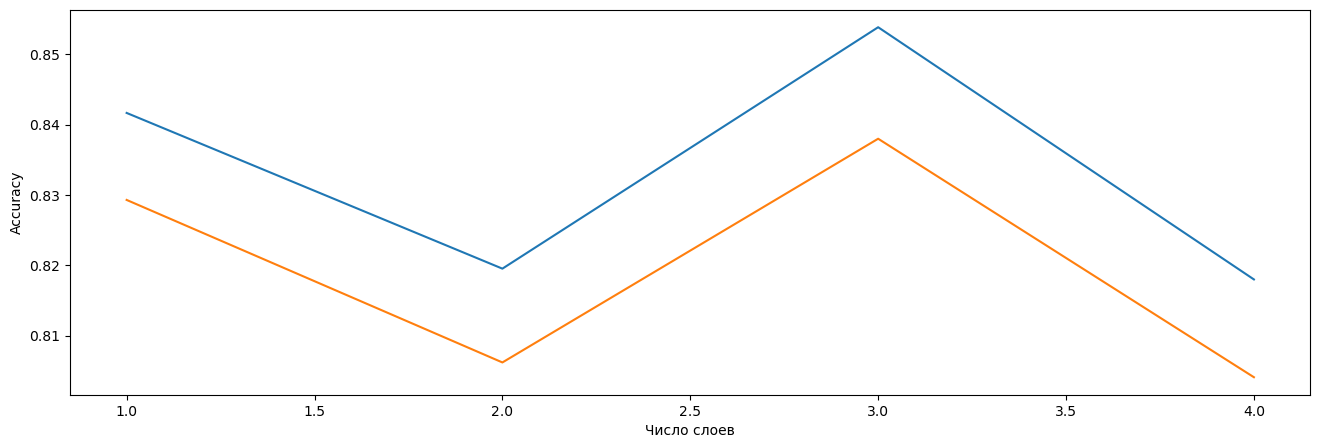

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.show()

Лучший результат показал себя на 3 внутрених слоях. Хотя картинки опять же странные. 